# ASTHMA DETECTION 

# Import Libraries 

In [118]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    roc_auc_score,
    confusion_matrix,
    classification_report,
    roc_curve,
    auc
)

# Load Data 

In [119]:
df = pd.read_csv("/kaggle/input/asthma-dataset/synthetic_asthma_dataset.csv")
df.head()

,Patient_ID,Age,Gender,BMI,Smoking_Status,Family_History,Allergies,Air_Pollution_Level,Physical_Activity_Level,Occupation_Type,Comorbidities,Medication_Adherence,Number_of_ER_Visits,Peak_Expiratory_Flow,FeNO_Level,Has_Asthma,Asthma_Control_Level
0,ASTH100000,52,Female,27.6,Former,1,NaN,Moderate,Sedentary,Outdoor,Diabetes,0.38,0,421.0,46.0,0,NaN
1,ASTH100001,15,Male,24.6,Former,0,Dust,Low,Moderate,Indoor,Both,0.60,2,297.6,22.9,0,NaN
2,ASTH100002,72,Female,17.6,Never,0,NaN,Moderate,Moderate,Indoor,NaN,0.38,0,303.3,15.3,0,NaN
3,ASTH100003,61,Male,16.8,Never,0,Multiple,High,Sedentary,Outdoor,Both,0.60,1,438.0,40.1,1,Poorly Controlled
4,ASTH100004,21,Male,30.2,Never,0,NaN,Moderate,Active,Indoor,NaN,0.82,3,535.0,27.7,0,NaN


# Data Analysis 


In [120]:
df.isnull().sum()

Patient_ID                    0
Age                           0
Gender                        0
BMI                           0
Smoking_Status                0
Family_History                0
Allergies                  2936
Air_Pollution_Level           0
Physical_Activity_Level       0
Occupation_Type               0
Comorbidities              4967
Medication_Adherence          0
Number_of_ER_Visits           0
Peak_Expiratory_Flow          0
FeNO_Level                    0
Has_Asthma                    0
Asthma_Control_Level       7567
dtype: int64

In [121]:
df.shape

(10000, 17)

In [122]:
df = df.drop(["Comorbidities","Asthma_Control_Level","Patient_ID"],axis=1)

In [123]:
df.head()

,Age,Gender,BMI,Smoking_Status,Family_History,Allergies,Air_Pollution_Level,Physical_Activity_Level,Occupation_Type,Medication_Adherence,Number_of_ER_Visits,Peak_Expiratory_Flow,FeNO_Level,Has_Asthma
0,52,Female,27.6,Former,1,NaN,Moderate,Sedentary,Outdoor,0.38,0,421.0,46.0,0
1,15,Male,24.6,Former,0,Dust,Low,Moderate,Indoor,0.60,2,297.6,22.9,0
2,72,Female,17.6,Never,0,NaN,Moderate,Moderate,Indoor,0.38,0,303.3,15.3,0
3,61,Male,16.8,Never,0,Multiple,High,Sedentary,Outdoor,0.60,1,438.0,40.1,1
4,21,Male,30.2,Never,0,NaN,Moderate,Active,Indoor,0.82,3,535.0,27.7,0


In [124]:
df.dtypes

Age                          int64
Gender                      object
BMI                        float64
Smoking_Status              object
Family_History               int64
Allergies                   object
Air_Pollution_Level         object
Physical_Activity_Level     object
Occupation_Type             object
Medication_Adherence       float64
Number_of_ER_Visits          int64
Peak_Expiratory_Flow       float64
FeNO_Level                 float64
Has_Asthma                   int64
dtype: object

In [125]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      10000 non-null  int64  
 1   Gender                   10000 non-null  object 
 2   BMI                      10000 non-null  float64
 3   Smoking_Status           10000 non-null  object 
 4   Family_History           10000 non-null  int64  
 5   Allergies                7064 non-null   object 
 6   Air_Pollution_Level      10000 non-null  object 
 7   Physical_Activity_Level  10000 non-null  object 
 8   Occupation_Type          10000 non-null  object 
 9   Medication_Adherence     10000 non-null  float64
 10  Number_of_ER_Visits      10000 non-null  int64  
 11  Peak_Expiratory_Flow     10000 non-null  float64
 12  FeNO_Level               10000 non-null  float64
 13  Has_Asthma               10000 non-null  int64  
dtypes: float64(4), int64(4)

In [126]:
df.describe()

,Age,BMI,Family_History,Medication_Adherence,Number_of_ER_Visits,Peak_Expiratory_Flow,FeNO_Level,Has_Asthma
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,44.930700,25.053320,0.303400,0.497998,1.015900,400.884090,25.101420,0.243300
std,25.653559,4.874466,0.459749,0.224809,1.020564,97.531113,9.840184,0.429096
min,1.000000,15.000000,0.000000,0.000000,0.000000,150.000000,5.000000,0.000000
25%,23.000000,21.600000,0.000000,0.320000,0.000000,334.800000,18.200000,0.000000
50%,45.000000,25.000000,0.000000,0.500000,1.000000,402.500000,25.000000,0.000000
75%,67.000000,28.400000,1.000000,0.670000,2.000000,468.700000,31.700000,0.000000
max,89.000000,45.000000,1.000000,0.990000,6.000000,600.000000,63.900000,1.000000


In [127]:
df["Has_Asthma"].value_counts()

Has_Asthma
0    7567
1    2433
Name: count, dtype: int64

# Data Preprocessing and Splitting 

In [128]:
le = LabelEncoder()

In [129]:
enc = ["Gender","Smoking_Status","Allergies","Air_Pollution_Level","Physical_Activity_Level","Occupation_Type"]

for col in enc: 
    df[col] = le.fit_transform(df[col])

In [130]:
df.head()

,Age,Gender,BMI,Smoking_Status,Family_History,Allergies,Air_Pollution_Level,Physical_Activity_Level,Occupation_Type,Medication_Adherence,Number_of_ER_Visits,Peak_Expiratory_Flow,FeNO_Level,Has_Asthma
0,52,0,27.6,1,1,4,2,2,1,0.38,0,421.0,46.0,0
1,15,1,24.6,1,0,0,1,1,0,0.60,2,297.6,22.9,0
2,72,0,17.6,2,0,4,2,1,0,0.38,0,303.3,15.3,0
3,61,1,16.8,2,0,1,0,2,1,0.60,1,438.0,40.1,1
4,21,1,30.2,2,0,4,2,0,0,0.82,3,535.0,27.7,0


In [131]:
X = df.drop("Has_Asthma",axis=1)
y = df["Has_Asthma"]

In [132]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

# Model Implementation


In [133]:
model = XGBClassifier(use_label_encoder=False, eval_metric='logloss')

# Fit the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

y_proba = model.predict_proba(X_test)[:, 1] 

# Evaluation


In [134]:
# Evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_proba)
conf_matrix = confusion_matrix(y_test, y_pred)

# Display results
print("=== Evaluation Metrics ===")
print(f"Accuracy     : {accuracy:.4f}")
print(f"Precision    : {precision:.4f}")
print(f"Recall       : {recall:.4f}")
print(f"F1 Score     : {f1:.4f}")
print(f"ROC AUC Score: {roc_auc:.4f}\n")

print("=== Classification Report ===")
print(classification_report(y_test, y_pred))

=== Evaluation Metrics ===
Accuracy     : 0.9990
Precision    : 0.9980
Recall       : 0.9980
F1 Score     : 0.9980
ROC AUC Score: 1.0000

=== Classification Report ===
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1504
           1       1.00      1.00      1.00       496

    accuracy                           1.00      2000
   macro avg       1.00      1.00      1.00      2000
weighted avg       1.00      1.00      1.00      2000



**CONFUSION MATRIX**

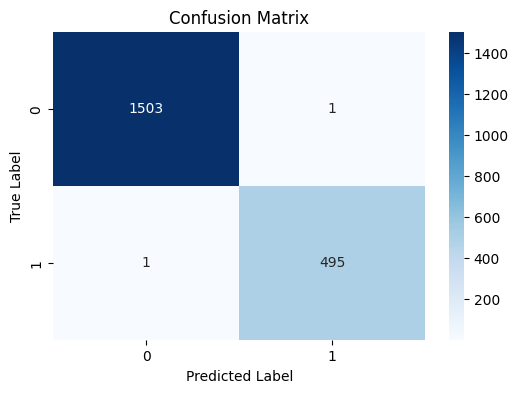

In [135]:
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

**ROC CURVE**

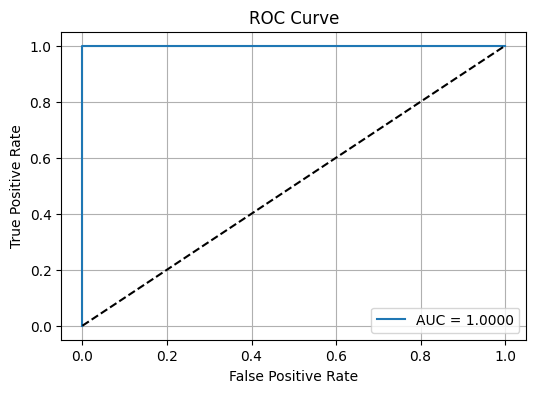

In [136]:
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.4f}")
plt.plot([0, 1], [0, 1], "k--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.grid(True)
plt.show()